In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import exp
import seaborn as sns
#from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

In [2]:
data=pd.read_csv('train_pp.csv')
X=data.drop('Survived',axis=1).to_numpy()
y=data['Survived'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=25)

In [3]:
y_train = y_train.reshape((y_train.shape[0],1))
y_train.shape

(801, 1)

# Backpropagation

In [4]:
class BPNN:
    def __init__(self,X,y,lr):
        self.inp=X
        self.wts=[np.random.uniform(size=(self.inp.shape[1],128)),
                  np.random.uniform(size=(128,64)),
                  np.random.uniform(size=(64,32)),
                  np.random.uniform(size=(32,16)),
                  np.random.uniform(size=(16,1))]
        self.base=[np.zeros((1,128)),
                   np.zeros((1,64)),
                   np.zeros((1,32)),
                   np.zeros((1,16)),
                   np.zeros((1,1))]
        self.lr=lr
        self.target=y
        self.layers=len(self.wts)-1
        self.total_loss=list()

    def FF(self,xin,a,z):
        for i in range(self.layers+1):
            z[i]=np.matmul(xin,self.wts[i])+self.base[i]
            if i==self.layers:
                a[i]=self.sigmoid(z[i])
            else:
                a[i]=self.relu(z[i])
            xin=a[i]
        print('##############################################################')
        print(a[0])
#         print('##############################################################')
#         print(a[1])
#         print('#############################################################')
#         print(a[2])
#         print('##############################################################')
#         print(a[3])
#         print('############################################################')
#         print(a[4])
        return a,z
    
    def loss(self,y_net,y_cap,batch):
        eps=1e-15
        df_e=y_net-y_cap
        y_net=np.maximum(eps,np.minimum(1-eps,y_net))
        e=-((y_cap)*np.log(y_net)+(1-y_cap)*np.log(1-y_net))
        return df_e,e
        
    def relu(self,x):
        x[x<0]=0
        return x
        
    def df_relu(self,x):
        x[x>=0]=1
        x[x<0]=0
        return x        
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def df_sigmoid(self,x):
        return self.sigmoid(x)*(1-self.sigmoid(x))
    
    def BP(self,df_e,delta,z,a):
        delta[self.layers]=df_e
        for i in range(self.layers-1,-1,-1):
            delta[i]=(np.matmul(delta[i+1],self.wts[i+1].T))*self.df_relu(z[i])
            print("HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH")
            print(a[1])
        return delta
    
    def update(self,x_cap,a,delta,batch):
        for i in range(self.layers,0,-1):
            self.wts[i]-=self.lr*np.matmul(a[i-1].T,delta[i])/batch
            self.base[i]-=self.lr*(np.sum(delta[i],axis=0,keepdims=True)/batch)
        
        self.wts[0]-=self.lr*np.matmul(x_cap.T,delta[0])/batch
        self.base[0]-=self.lr*(np.sum(delta[0],axis=0,keepdims=True)/batch)
        
    
    def train(self, epoch=20, batch=32):
        for i in range(epoch):
            print('------------------------------------')
            print(f'epoch: {i+1}/{epoch}')
            
            loss_per_epo=list()
            a=[0]*(self.layers+1)
            z=[0]*(self.layers+1)
            delta=[1]*(self.layers+1)
            
            for j in range(0,self.inp.shape[0],batch):
                x_cap=self.inp[j:j+batch]
                y_cap=self.target[j:j+batch].reshape(len(self.target[j:j+batch]),1)
                a,z=self.FF(x_cap,a,z)
#                 if j==0:
#                     print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
#                     print(a[0])
#                     print('%%%%%%%%%%%%%%%##############################################################')
#                     print(a[1])
#                     print('%%%%%%%%%%%%%%%%%##############################################################')
#                     print(a[2])
#                     print('%%%%%%%%%%%%%%%##############################################################')
#                     print(a[3])
#                     print('%%%%%%%%%%%%%%%%%%%##############################################################')
#                     print(a[4])
                df_e,e=self.loss(a[-1],y_cap,batch)
#                 if j==0:
#                     print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
#                     print(a[0])
                loss_per_epo.append(sum(e)[0])
                if j==0:
                    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
                    print(a[0])
                delta= self.BP(df_e,delta,z,a)
                if j==0:
                    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
                    print(a[0])
                self.update(x_cap,a,delta,batch)
#                 if j==0:
#                     print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
#                     print(a[0])

                
                
#                 print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#                 print(f'x_cap:{x_cap}')
#                 print(f'y_cap:{y_cap}')
#                 print(f'a:{a}')
#                 print(f'z:{z}')
#                 print(a[-1])
#                 print(f'error:{np.concatenate((a[-1],y_cap,delta[4]),axis=1)}')
#                 print(f'delta:{delta}')
            
#             print(f'weights: {self.wts}')
#             print(f'base: {self.base}')
            
            loss_avg=sum(loss_per_epo)/self.inp.shape[0]
            self.total_loss.append(loss_avg)
            print(f'loss: {loss_avg}')
            
    def get_loss(self):
        return self.total_loss

In [5]:
#Backpropogation
cyc=2
BP_nn=BPNN(X_train,y_train,lr=0.1)

In [6]:
BP_nn.train(epoch=cyc)

------------------------------------
epoch: 1/2
##############################################################
[[ 8.16354394 12.81156163 22.75416784 ... 28.66458184 12.72104304
  15.50685979]
 [12.58571162 12.90267124 24.75258214 ... 33.24028021 19.51458592
  21.83261598]
 [14.63522905 17.65947804 28.27737969 ... 31.10416145 20.51479136
  26.30137323]
 ...
 [14.43012187 17.53528584 33.83185682 ... 49.86293728 22.41605255
  27.46278807]
 [ 8.08936973 14.00991488 24.44920612 ... 34.67802503 13.38684276
  16.55519183]
 [10.51554536 14.34446366 23.2401727  ... 22.24588322 13.70503707
  17.8216316 ]]
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
[[ 8.16354394 12.81156163 22.75416784 ... 28.66458184 12.72104304
  15.50685979]
 [12.58571162 12.90267124 24.75258214 ... 33.24028021 19.51458592
  21.83261598]
 [14.63522905 17.65947804 28.27737969 ... 31.10416145 20.51479136
  26.30137323]
 ...
 [14.43012187 17.53528584 33.83185682 ... 49.86293728 22.41605255
  27.46

In [7]:
loss_train = BP_nn.get_loss()

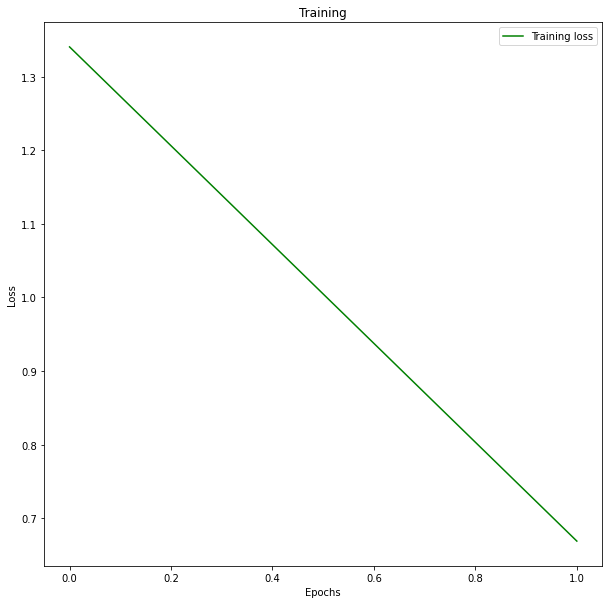

In [8]:
plt.figure(figsize=(10,10))
plt.plot(range(cyc), loss_train, 'g', label='Training loss')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
class DFANN_IMP:
    def __init__(self,X,y,lr):
        self.inp=X
        self.wts=[np.random.rand(self.inp.shape[1],3),
                  np.random.rand(3,2),
                  np.random.rand(2,1)]
        self.lr=lr
        self.y=y
        self.layers=len(self.wts)-1
        self.total_loss=list()
        self.z=[0,0,0]
        self.a=[0,0,0]
        self.delta=[np.zeros((self.inp.shape[0],3)),np.zeros((self.inp.shape[0],2))]
        self.bp_flag=1
        
#         self.w1=np.random.rand(self.inp.shape[1],3)
#         self.w2=np.random.rand(3,2)
#         self.w3=np.random.rand(2,1)
#         self.b1=np.zeros((1,3))
#         self.b2=np.zeros(2)
#         self.b3=np.zeros(1)
#         self.B3=np.random.rand(2,1)
#         self.B2=np.random.rand(3,1)
    
    def FF(self):
        xin=self.inp
        for i in range(self.layers+1):
            self.z[i]=np.matmul(xin,self.wts[i])
            self.a[i]=self.f_sigmoid(self.z[i])
            xin=self.a[i]
        
        # self.a[2] will be the final output *************************
        
#         self.z1=np.matmul(self.inp,self.w1)
#         self.a1=self.f_sigmoid(self.z1)
        
#         self.z2=np.matmul(self.a1,self.w2)
#         self.a2=self.f_sigmoid(self.z2)
        
#         self.z3=np.matmul(self.a2,self.w3)
#         self.out=self.f_sigmoid(self.z3)
    
    def loss(self):
        self.e=self.a[2]-self.y
        self.total_loss.append(np.sum(self.e**2))
        
    def get_loss(self):
        return self.total_loss
        
    def BP(self):
        if self.bp_flag==1:
            B=np.random.rand(2,1)
            self.delta[1]=self.df_sigmoid(self.z[1])*np.matmul(self.e,B.T)
            self.bp_flag=0
        else:
            B=np.random.rand(3,1)
            self.delta[0]=self.df_sigmoid(self.z[0])*np.matmul(self.e,B.T)
            self.bp_flag=1
            
#         self.d2=self.df_sigmoid(self.z2)*np.matmul(self.e,self.B3.T)
#         self.d1=self.df_sigmoid(self.z1)*np.matmul(self.e,self.B2.T)
        
    def update(self):
        self.wts[2]-=self.lr*np.matmul(self.a[1].T,self.e)
        if self.bp_flag==1:
            self.wts[1]-=self.lr*np.matmul(self.a[0].T, self.delta[1])
        else:
#             print(self.inp.T.shape,self.delta[0].shape)
            self.wts[0]-=self.lr*np.matmul(self.inp.T, self.delta[0])
            
#         self.b3 = self.b3-self.lr*self.e
#         self.b2 = self.b2-self.lr*self.d2
#         self.b1 = self.b1-self.lr*self.d1
        
    def f_sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def df_sigmoid(self,x):
        return self.f_sigmoid(x)*(1-self.f_sigmoid(x))
    
    def train(self, itr=1000):
        for i in range(itr):
            self.FF()
            self.loss()
            self.BP()
            self.update()
    
    def predict(self,x_test):
        xin=x_test
        for i in range(self.layers+1):
            z_pred=np.matmul(xin,self.wts[i])
            a_pred=self.f_sigmoid(z_pred)
            xin=a_pred
        
        return xin
        
#         z1_pred=np.matmul(x_test,self.w1)
#         a1_pred=self.f_sigmoid(z1_pred)
        
#         z2_pred=np.matmul(a1_pred,self.w2)
#         a2_pred=self.f_sigmoid(z2_pred)
        
#         z3_pred=np.matmul(a2_pred,self.w3)
#         y_pred=self.f_sigmoid(z3_pred)
        
#         return y_pred
    
    def show(self):
        print(f'w1: {self.wts[0].shape}')
        print(f'w2: {self.wts[1].shape}')        
        print(f'w3: {self.wts[2].shape}')        
#         print(f'b1: {self.b1.shape}')        
#         print(f'b2: {self.b2.shape}')        
#         print(f'b2: {self.b3.shape}')        

# DFA

In [10]:
class DFANN:
    def __init__(self,X,y,lr):
        self.inp=X
        self.w1=np.random.rand(self.inp.shape[1],3)
        self.w2=np.random.rand(3,2)
        self.w3=np.random.rand(2,1)
#         self.b1=np.zeros((1,3))
#         self.b2=np.zeros(2)
#         self.b3=np.zeros(1)
        self.lr=lr
        self.y=y
        self.out=np.zeros(y.shape)
        self.l=list()
        self.B3=np.random.rand(2,1)
        self.B2=np.random.rand(3,1)
    
    def FF(self):
        self.z1=np.matmul(self.inp,self.w1)
        self.a1=self.f_sigmoid(self.z1)
        
        self.z2=np.matmul(self.a1,self.w2)
        self.a2=self.f_sigmoid(self.z2)
        
        self.z3=np.matmul(self.a2,self.w3)
        self.out=self.f_sigmoid(self.z3)
    
    def loss(self):
        self.e=self.out-self.y
        self.l.append(np.sum(self.e**2))
        
    def get_loss(self):
        return self.l
        
    def BP(self):
        self.d2=self.df_sigmoid(self.z2)*np.matmul(self.e,self.B3.T)
        self.d1=self.df_sigmoid(self.z1)*np.matmul(self.e,self.B2.T)
        
    def update(self):
        self.w3 = self.w3-self.lr*np.matmul(self.a2.T,self.e)
        self.w2 = self.w2-self.lr*np.matmul(self.a1.T, self.d2)
        self.w1 = self.w1-self.lr*np.matmul(self.inp.T, self.d1)
#         self.b3 = self.b3-self.lr*self.e
#         self.b2 = self.b2-self.lr*self.d2
#         self.b1 = self.b1-self.lr*self.d1
        
    def f_sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def df_sigmoid(self,x):
        return self.f_sigmoid(x)*(1-self.f_sigmoid(x))
    
    def train(self, itr=100):
        for i in range(itr):
            self.FF()
            self.loss()
            self.BP()
            self.update()
    
    def predict(self,x_test):
        z1_pred=np.matmul(x_test,self.w1)
        a1_pred=self.f_sigmoid(z1_pred)
        
        z2_pred=np.matmul(a1_pred,self.w2)
        a2_pred=self.f_sigmoid(z2_pred)
        
        z3_pred=np.matmul(a2_pred,self.w3)
        y_pred=self.f_sigmoid(z3_pred)
        
        return y_pred
    
    def show(self):
        print(f'w1: {self.w1.shape}')
        print(f'w2: {self.w2.shape}')        
        print(f'w3: {self.w3.shape}')        
#         print(f'b1: {self.b1.shape}')        
#         print(f'b2: {self.b2.shape}')        
#         print(f'b2: {self.b3.shape}')        

# DFA_newAlgo

# Something good probably

In [11]:
class DFANN_X:
    def __init__(self,X,y,lr):
        self.inp=X
        self.w1=np.random.rand(self.inp.shape[1],3)
        self.w2=np.random.rand(3,2)
        self.w3=np.random.rand(2,1)
#         self.b1=np.zeros((1,3))
#         self.b2=np.zeros(2)
#         self.b3=np.zeros(1)
        self.lr=lr
        self.y=y
        self.out=np.zeros(y.shape)
        self.l=list()
        self.B3=np.random.rand(2,1)
        self.B2=np.random.rand(3,1)
        self.ac=[0,0]
    
    def FF(self):
        self.z1=np.matmul(self.inp,self.w1)
        self.a1=self.f_sigmoid(self.z1)
        
        self.z2=np.matmul(self.a1,self.w2)
        self.a2=self.f_sigmoid(self.z2)
        
        self.z3=np.matmul(self.a2,self.w3)
        self.out=self.f_sigmoid(self.z3)
    
    def loss(self):
        self.e=self.out-self.y
        self.l.append(np.sum(self.e**2))
        
    def get_loss(self):
        return self.l
        
    def BP(self):
        self.w3 = self.w3-self.lr*np.matmul(self.a2.T,self.e)
        if np.sum(self.z2)>np.sum(self.z1):
            self.d2=self.df_sigmoid(self.z2)*np.matmul(self.e,self.B3.T)
            self.w2-=self.lr*np.matmul(self.a1.T, self.d2)
            self.ac[1]+=1
        else:
            self.d1=self.df_sigmoid(self.z1)*np.matmul(self.e,self.B2.T)
            self.w1-=self.lr*np.matmul(self.inp.T, self.d1)
            self.ac[0]+=1
    
    def count_act(self):
        return self.ac
        
#     def update(self):
#         self.w3 = self.w3-self.lr*np.matmul(self.a2.T,self.e)
#         self.w2 = self.w2-self.lr*np.matmul(self.a1.T, self.d2)
#         self.w1 = self.w1-self.lr*np.matmul(self.inp.T, self.d1)
#         self.b3 = self.b3-self.lr*self.e
#         self.b2 = self.b2-self.lr*self.d2
#         self.b1 = self.b1-self.lr*self.d1
        
    def f_sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def df_sigmoid(self,x):
        return self.f_sigmoid(x)*(1-self.f_sigmoid(x))
    
    def train(self, itr=100):
        for i in range(itr):
            self.FF()
            self.loss()
            self.BP()
#             self.update()
    
    def predict(self,x_test):
        z1_pred=np.matmul(x_test,self.w1)
        a1_pred=self.f_sigmoid(z1_pred)
        
        z2_pred=np.matmul(a1_pred,self.w2)
        a2_pred=self.f_sigmoid(z2_pred)
        
        z3_pred=np.matmul(a2_pred,self.w3)
        y_pred=self.f_sigmoid(z3_pred)
        
        return y_pred
    
    def show(self):
        print(f'w1: {self.w1.shape}')
        print(f'w2: {self.w2.shape}')        
        print(f'w3: {self.w3.shape}')        
#         print(f'b1: {self.b1.shape}')        
#         print(f'b2: {self.b2.shape}')        
#         print(f'b2: {self.b3.shape}')        

In [12]:
# data = {'x1':[0, 0, 1, 0],
#         'x2':[0, 1, 1, 1],
#         'x3':[1, 0, 1, 1],
#         'y':[1, 1, 1, 0]}
# df = pd.DataFrame(data)

# X_train = df.iloc[:,:3].to_numpy()
# y_train = df.iloc[:,3:4].to_numpy()

In [13]:
# train_data=pd.read_csv('Data/train.csv')
# ind=np.random.randint(0,371,100)
# train_data=train_data.iloc[ind,:]
# train_data.shape

In [14]:
# X=train_data[['bone_length','rotting_flesh','hair_length','has_soul']].to_numpy()
# y=train_data['type'].to_numpy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25, test_size=0.25)
# y_train=y_train.reshape(-1,1)
# y_test=y_test.reshape(-1,1)

In [15]:
#Backpropogation
cyc=10
BP_nn=BPNN(X_train,y_train,lr=0.1)

In [16]:
BP_nn.train(itr=cyc)

TypeError: train() got an unexpected keyword argument 'itr'

In [ ]:
loss_train = BP_nn.get_loss()

plt.figure(figsize=(10,10))
plt.plot(range(cyc), loss_train, 'g', label='Training loss')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
data=pd.read_csv('E:/Reseach/NewAlgo/Data/MNIST/train/train.csv')
data.shape

In [ ]:
#DFA
cyc=10000
DFA_nn=DFANN(X_train,y_train,lr=0.01)
DFA_nn.train(itr=cyc)
loss_train = DFA_nn.get_loss()

plt.figure(figsize=(10,10))
plt.plot(range(cyc), loss_train, 'g', label='Training loss')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#DFA_newAlgo
cyc=30000
DFA_nn_imp=DFANN_IMP(X_train,y_train,lr=0.05)
DFA_nn_imp.train(itr=cyc)
loss_train = DFA_nn_imp.get_loss()

plt.figure(figsize=(10,10))
plt.plot(range(cyc), loss_train, 'g', label='Training loss')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#SGP
cyc=10000
DFA_nn_X=DFANN_X(X_train,y_train,lr=0.1)
DFA_nn_X.train(itr=cyc)
loss_train = DFA_nn_X.get_loss()

plt.figure(figsize=(10,10))
plt.plot(range(cyc), loss_train, 'g', label='Training loss')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
DFA_nn_X.count_act()

In [ ]:
#SGP
cyc=10000
DFA_nn_X=DFANN_X(X_train,y_train,lr=0.1)
DFA_nn_X.train(itr=cyc)
loss_train = DFA_nn_X.get_loss()

plt.figure(figsize=(10,10))
plt.plot(range(cyc), loss_train, 'g', label='Training loss')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
DFA_nn_X.count_act()

In [ ]:
#Backpropogation
cyc=10000
BP_nn=BPNN(X_train,y_train,lr=0.005)
BP_nn.train(itr=cyc)
loss_train = BP_nn.get_loss()

plt.figure(figsize=(10,10))
plt.plot(range(cyc), loss_train, 'g', label='Training loss')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()